# Uber Data Analysis

## Loading the Data

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import klib

In [2]:
#loading the Data set
uber_data_df = pd.read_csv("UberDataset.csv", parse_dates=True)
uber_df = uber_data_df.copy()
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Understanding the Data

In [3]:
# Determining the no. of records in our dataset
uber_df.shape

(1155, 7)

In [4]:
# Previewing the bottom of our dataset
uber_df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
# Exploring the descriptive statistics of the variables
uber_df.describe(include='all')

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1155,1155,1155,1155,1155,1155.000000,653
unique,1154,1154,2,177,188,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,10.566840,NaN
std,NaN,NaN,NaN,NaN,NaN,21.579106,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [6]:
# Checking for data set info
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
# Converting data types
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'])
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'])

#uber_df['CATEGORY'] = uber_df['CATEGORY'].astype('str')

In [8]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [9]:
# Checking for duplicates
uber_df[uber_df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting


In [10]:
# Drop duplicated row
uber_df.drop_duplicates(inplace=True)

In [11]:
# Check for nulls
uber_df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [12]:
# Fill 'UNKOWN' for [Purpose]
uber_df["PURPOSE"] = uber_df["PURPOSE"].fillna("Unkown")
uber_df.dropna(inplace = True)

In [13]:
uber_df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Feature Engineering

In [14]:
# creating new features
uber_df["YEAR"] = uber_df['START_DATE'].dt.year
uber_df["MONTH"] = uber_df['START_DATE'].dt.month_name()
uber_df["DAY"] = uber_df['START_DATE'].dt.day_name()
uber_df["DURATION"] = (uber_df['END_DATE'] - uber_df['START_DATE']).astype('timedelta64[m]')

time_periods = [0,6,12,18,24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
uber_df['TimeOfDay'] = pd.cut(uber_df['START_DATE'].dt.hour, bins = time_periods, labels = labels, right = False)


In [15]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,YEAR,MONTH,DAY,DURATION,TimeOfDay
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,Friday,6.0,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unkown,2016,January,Saturday,12.0,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,Saturday,13.0,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,Tuesday,14.0,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,Wednesday,67.0,Afternoon


## Simple Visualizations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Unkown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

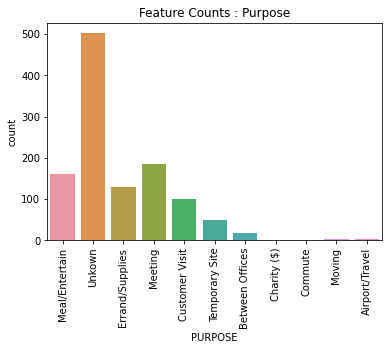

In [16]:
sns.countplot(x=uber_df["PURPOSE"])
plt.title("Feature Counts : Purpose")
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

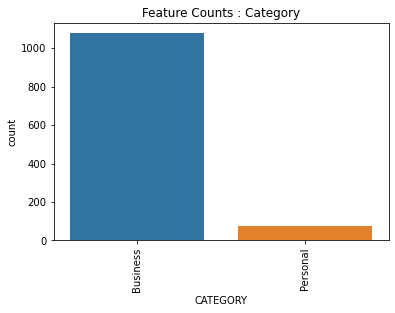

In [17]:
sns.countplot(x=uber_df["CATEGORY"])
plt.title("Feature Counts : Category")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

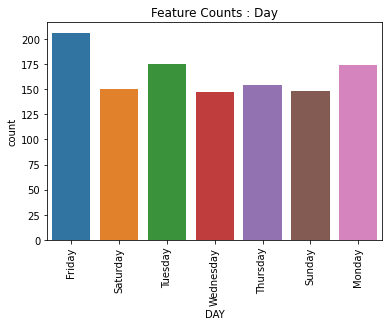

In [18]:
sns.countplot(x=uber_df["DAY"])
plt.title("Feature Counts : Day")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening')])

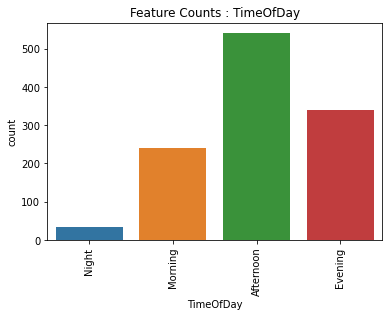

In [19]:
sns.countplot(x=uber_df["TimeOfDay"])
plt.title("Feature Counts : TimeOfDay")
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

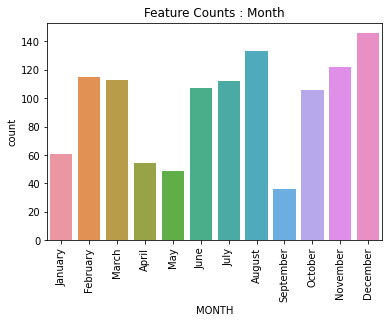

In [20]:
sns.countplot(x=uber_df["MONTH"])
plt.title("Feature Counts : Month")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Outliers in Miles Over Time of Day')

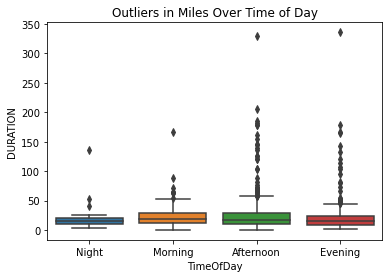

In [21]:
sns.boxplot(x=uber_df["TimeOfDay"], y=uber_df["DURATION"])
plt.title("Outliers in Miles Over Time of Day")

Text(0.5, 1.0, 'Outliers in Duration')

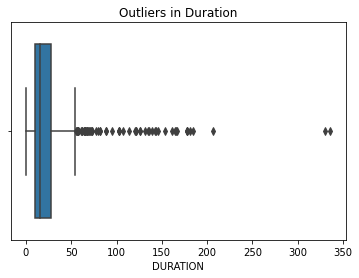

In [22]:
sns.boxplot(x=uber_df["DURATION"], data = uber_df)
plt.title("Outliers in Duration")

Text(0.5, 1.0, 'Outliers in Miles')

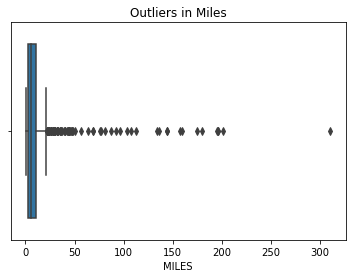

In [23]:
sns.boxplot(x=uber_df["MILES"], data = uber_df)
plt.title("Outliers in Miles")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Unkown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

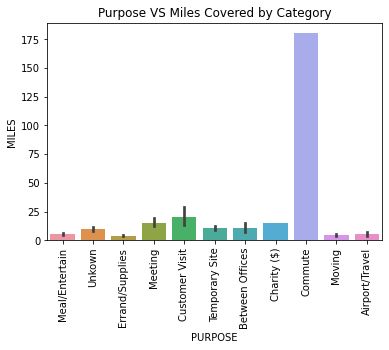

In [24]:
sns.barplot(x= uber_df["PURPOSE"], y = uber_df["MILES"])
plt.title("Purpose VS Miles Covered by Category")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Density Plots for Miles and Duration')

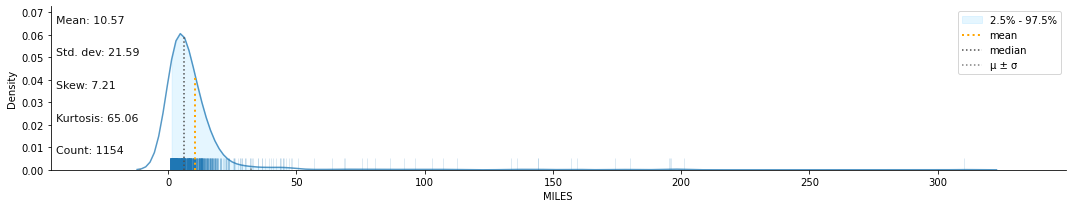

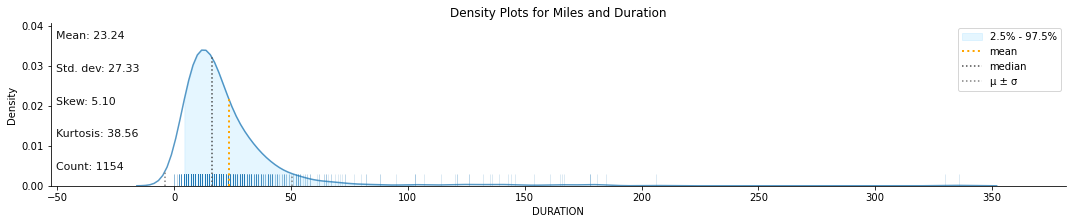

In [25]:
klib.dist_plot(uber_df)
plt.title("Density Plots for Miles and Duration")

In [26]:
#Creating a pivot table with sum of 'MILES' for each 'TimeOfDay' period and 'PURPOSE'
pivot_table = uber_df.pivot_table(index='TimeOfDay', columns = 'PURPOSE', values = 'MILES', aggfunc = 'sum', fill_value = 0)
pivot_table

PURPOSE,Airport/Travel,Between Offices,Charity ($),Commute,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site,Unkown
TimeOfDay,,,,,,,,,,,
Night,0.0,12.4,0.0,0.0,51.9,26.6,29.3,237.3,0.0,0.0,43.2
Morning,7.6,63.2,15.1,0.0,268.1,62.3,187.6,392.0,18.2,135.3,849.7
Afternoon,8.9,86.7,0.0,180.2,1348.0,256.7,367.1,1064.5,0.0,229.9,2783.0
Evening,0.0,34.7,0.0,0.0,421.5,162.4,327.7,1147.6,0.0,158.5,1217.6


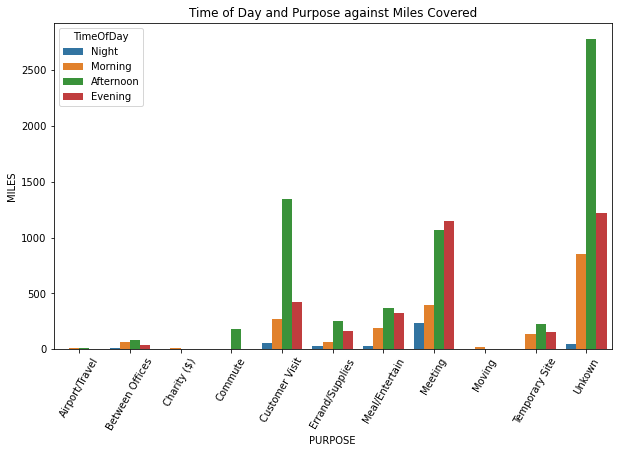

In [27]:
#Converting the Dictionary to a DataFrame
df_pivot = pd.DataFrame(pivot_table)

#Melting the vizualization to work with Seaborn
df_melted = df_pivot.reset_index().melt(id_vars = 'TimeOfDay', var_name = 'PURPOSE', value_name = 'MILES')

plt.figure(figsize = (10,6))
sns.barplot(x = 'PURPOSE', y = 'MILES', hue = 'TimeOfDay', data = df_melted)
plt.xticks(rotation = 60)
plt.xlabel('PURPOSE')
plt.ylabel('MILES')
plt.legend(title = 'TimeOfDay')
plt.title("Time of Day and Purpose against Miles Covered")

plt.show()

In [34]:
from IPython.display import FileLink, FileLinks
uber_df.to_excel('C:\\Users\\M\\Downloads\\uber_df_clean.xlsx', index = False)